### Q1

In [85]:
import pandas as pd
from datetime import timedelta as dt

data = pd.read_csv('C:\phyton - exc/matala2_cosmetics_2019-Nov_new.csv')
data['event_time'] = pd.to_datetime(data['event_time'], format = '%Y-%m-%d %H:%M:%S %Z')
data =data.sort_values(['user_session', 'event_time'])
#data_sort = data_sort.iloc[:10000, :]

data['duration_to_next_event'] = (data.groupby('user_session')['event_time'].apply(lambda x: (x.shift(-1) - x).dt.seconds.fillna(0)))

<ipython-input-85-f64bdf1f7ffa>:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('C:\phyton - exc/matala2_cosmetics_2019-Nov_new.csv')
<ipython-input-85-f64bdf1f7ffa>:9: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data['duration_to_next_event'] = (data.groupby('user_session')['event_time'].apply(lambda x: (x.shift(-1) - x).dt.seconds.fillna(0)))


In [86]:
data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event
522763,2019-11-05 07:57:05+00:00,view,5829298,1487580011585077370,NaN,farmstay,0.79,556321594,00000dd2-0f5d-4fc9-9d6b-2fc8c7514b04,0.0
1443597,2019-11-11 12:15:10+00:00,view,5771614,2193074740619379535,furniture.living_room.cabinet,kosmekka,150.79,570103701,00001bc6-1e04-4861-be5d-1bc73929c21a,0.0
1933123,2019-11-15 03:50:03+00:00,view,5568472,1487580005595612013,NaN,NaN,3.0,571677620,00001e77-5db8-4e96-ab7a-022ed3caf8b3,0.0
1662416,2019-11-13 04:37:37+00:00,view,5864850,1487580005268456287,NaN,NaN,12.7,504468592,00004c7d-9507-474e-a559-0fdaccaaa390,0.0
1800687,2019-11-14 03:59:32+00:00,view,5861620,1487580008263189483,NaN,lador,2.25,571211128,0000597b-de39-4a77-9fe5-02c8792ca14e,56.0
...,...,...,...,...,...,...,...,...,...,...
4601243,2019-11-30 19:03:25+00:00,remove_from_cart,5754302,1487580009286598681,NaN,lianail,1.78,391748818,NaN,NaN
4601283,2019-11-30 19:03:36+00:00,remove_from_cart,5760335,1487580009261432856,NaN,zinger,1.9,391748818,NaN,NaN
4601318,2019-11-30 19:03:44+00:00,remove_from_cart,5694465,1487580008112194531,NaN,NaN,4.68,391748818,NaN,NaN
4601352,2019-11-30 19:03:56+00:00,remove_from_cart,5788423,1487580007306888126,NaN,NaN,3.33,391748818,NaN,NaN


### Q2

In [87]:
from datetime import timedelta

# Sort the DataFrame by user and event time
data_sort_new = data.sort_values(['user_id', 'event_time'])

# Calculate the time difference between consecutive events for each user
data_sort_new["time_diff"] = data_sort_new.groupby("user_id")["event_time"].diff()

data_sort_new["new_funnel"] = data_sort_new["time_diff"].isnull() | (data_sort_new["time_diff"] > timedelta(days=5))

# Cumulatively sum the Boolean column to assign funnel numbers
data_sort_new["funnel_number"] = data_sort_new.groupby("user_id")["new_funnel"].cumsum()
# Drop the intermediate columns
data_sort_new = data_sort_new.drop(columns=["time_diff", "new_funnel"])
data_sort_new

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number
437209,2019-11-04 15:28:57+00:00,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0.0,1
2483241,2019-11-19 09:56:09+00:00,view,5711145,1487580005008409427,NaN,f.o.x,6.03,1458813,b16644a2-44db-4650-8156-f6f03782d432,0.0,1
2494623,2019-11-19 11:14:48+00:00,view,5814066,1487580005855658874,NaN,grattol,2.3,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,0.0,1
2640971,2019-11-20 11:58:06+00:00,view,5800358,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,21.0,1
2641003,2019-11-20 11:58:27+00:00,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,72.0,1
...,...,...,...,...,...,...,...,...,...,...,...
4635733,2019-11-30 23:56:14+00:00,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,3.0,1
4635736,2019-11-30 23:56:17+00:00,view,5900651,1487580013950664926,NaN,NaN,19.52,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,4.0,1
4635737,2019-11-30 23:56:21+00:00,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,0.0,1
4635752,2019-11-30 23:56:46+00:00,view,5790563,1487580008263189483,NaN,NaN,7.14,579968937,878af093-7570-48ae-966c-d50ce61e390c,0.0,1


### Q3

In [88]:
data_sort_new.sort_values(['funnel_number','user_id', 'user_session'], inplace=True)
data_sort_new['index_in_funnel'] = data_sort_new.groupby(['user_id','funnel_number'])['user_session'].transform(lambda x: x.ne(x.shift()).cumsum())
data_sort_new

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number,index_in_funnel
437209,2019-11-04 15:28:57+00:00,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0.0,1,1
2494623,2019-11-19 11:14:48+00:00,view,5814066,1487580005855658874,NaN,grattol,2.3,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,0.0,1,1
2640971,2019-11-20 11:58:06+00:00,view,5800358,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,21.0,1,2
2641003,2019-11-20 11:58:27+00:00,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,72.0,1,2
2641209,2019-11-20 11:59:39+00:00,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,28.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4474948,2019-11-30 00:09:38+00:00,view,5835333,1926797403503985079,NaN,NaN,2.95,563953546,45c192a2-e884-4fe7-a07d-b837822656c2,8.0,5,1
4474956,2019-11-30 00:09:46+00:00,view,5811663,1487580005427839846,NaN,irisk,2.3,563953546,45c192a2-e884-4fe7-a07d-b837822656c2,9.0,5,1
4474962,2019-11-30 00:09:55+00:00,view,5877392,1487580005671109489,NaN,masura,1.6,563953546,45c192a2-e884-4fe7-a07d-b837822656c2,7.0,5,1
4474965,2019-11-30 00:10:02+00:00,view,5765193,1487580005671109489,NaN,masura,1.73,563953546,45c192a2-e884-4fe7-a07d-b837822656c2,0.0,5,1


### Q4

In [116]:
import re
data = data.astype({'price':str})
#data[['price']].sort_values(by=['price'],ascending=False)
data['price'] = data['price'].str.extract(r'(\d+\.\d+)|\d+').astype(float)

In [118]:
#data['price'].max()

327.78

In [ ]:
data['price']

### Q5

<AxesSubplot:title={'center':'Numbers of enents by type'}, xlabel='Event Type', ylabel='Numbers of events'>

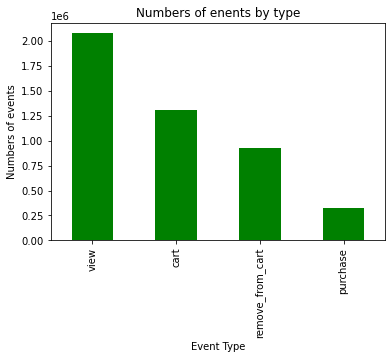

In [119]:
data['event_type'].value_counts().plot(kind='bar', color = 'green', title='Numbers of enents by type',xlabel='Event Type', ylabel='Numbers of events' )

### Q6

In [120]:
session_data = pd.DataFrame(data_sort_new[['user_id','user_session','funnel_number','index_in_funnel','event_type','event_time']])
session_data['num_of_events']=session_data.groupby(['user_id','user_session'])['index_in_funnel'].transform('count')
session_data.sort_values(['user_session','event_time'], inplace=True)
session_data['session_time']=session_data.groupby(['user_id','user_session','funnel_number'])['event_time'].transform(lambda x:x.max()-x.min())

list_of_viewed = pd.DataFrame(data_sort_new[data_sort_new['event_type'] == 'view'].groupby(['user_session','user_id'])['product_id'].apply(list).reset_index().rename(columns={'product_id':"list_of_viewed"}))
list_of_added_to_cart = pd.DataFrame(data_sort_new[data_sort_new['event_type'] == 'cart'].groupby(['user_session','user_id'])['product_id'].apply(list).reset_index().rename(columns={'product_id':"list_of_added_to_cart"}))
list_of_purchased = pd.DataFrame(data_sort_new[data_sort_new['event_type'] == 'purchased'].groupby(['user_session','user_id'])['product_id'].apply(list).reset_index().rename(columns={'product_id':"list_of_purchased"}))

session_data=session_data.merge(list_of_viewed, on="user_session",how = 'left')
session_data=session_data.merge(list_of_added_to_cart,on='user_session',how='left')
session_data=session_data.merge(list_of_purchased, on='user_session',how='left')

session_data

<ipython-input-120-f95559f14855>:8: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  list_of_purchased = pd.DataFrame(data_sort_new[data_sort_new['event_type'] == 'purchased'].groupby(['user_session','user_id'])['product_id'].apply(list).reset_index().rename(columns={'product_id':"list_of_purchased"}))
<ipython-input-120-f95559f14855>:12: FutureWarning: Passing 'suffixes' which cause duplicate columns {'user_id_x'} in the result is deprecated and will raise a MergeError in a future version.
  session_data=session_data.merge(list_of_purchased, on='user_session',how='left')


,user_id_x,user_session,funnel_number,index_in_funnel,event_type,event_time,num_of_events,session_time,user_id_y,list_of_viewed,user_id_x,list_of_added_to_cart,user_id_y,list_of_purchased
0,556321594,00000dd2-0f5d-4fc9-9d6b-2fc8c7514b04,1,1,view,2019-11-05 07:57:05+00:00,1.0,0 days 00:00:00,556321594.0,[5829298],NaN,NaN,NaN,NaN
1,570103701,00001bc6-1e04-4861-be5d-1bc73929c21a,1,1,view,2019-11-11 12:15:10+00:00,1.0,0 days 00:00:00,570103701.0,[5771614],NaN,NaN,NaN,NaN
2,571677620,00001e77-5db8-4e96-ab7a-022ed3caf8b3,1,1,view,2019-11-15 03:50:03+00:00,1.0,0 days 00:00:00,571677620.0,[5568472],NaN,NaN,NaN,NaN
3,504468592,00004c7d-9507-474e-a559-0fdaccaaa390,2,1,view,2019-11-13 04:37:37+00:00,1.0,0 days 00:00:00,504468592.0,[5864850],NaN,NaN,NaN,NaN
4,571211128,0000597b-de39-4a77-9fe5-02c8792ca14e,1,1,view,2019-11-14 03:59:32+00:00,3.0,0 days 00:02:31,571211128.0,"[5861620, 5861619, 5861591]",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4636095,391748818,NaN,1,7,remove_from_cart,2019-11-30 19:03:25+00:00,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4636096,391748818,NaN,1,8,remove_from_cart,2019-11-30 19:03:36+00:00,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4636097,391748818,NaN,1,9,remove_from_cart,2019-11-30 19:03:44+00:00,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4636098,391748818,NaN,1,10,remove_from_cart,2019-11-30 19:03:56+00:00,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
